# QC vs Signal

Importing the QC file:

In [5]:
import pandas as pd

qc = pd.read_excel("mmc1-QC.xlsx")
print(qc.head())


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

Extracting the two spreadsheets and creating a different file for each. Then, filtering them so we only have information relevant to abT and Tact cells:

In [ ]:
import pandas as pd

# 1. Read both sheets
path = "mmc1-QC.xlsx"
sp = pd.read_excel(path, sheet_name="SortedPopulations")
rs = pd.read_excel(path, sheet_name="Read Statistics")

# 2. Filter SortedPopulations to abT & T.act
sp_filtered = sp[sp["Lineage"].isin(["abT", "T.act"])].copy()

# 3. Keep only these specified cell‐type rows in Read Statistics
keep_names = [
    "preT.DN1.Th", "preT.DN2a.Th", "preT.DN2b.Th", "preT.DN3.Th",
    "T.DN4.Th", "T.ISP.Th", "T.DP.Th", "T.4.Th",   "T.8.Th",
    "T.4.Nve.Sp", "T.4.Nve.Fem.Sp", "T.8.Nve.Sp",
    "T.4.Sp.aCD3+CD40.18hr",
    "Treg.4.FP3+.Nrplo.Co", "Treg.4.25hi.Sp",
    "T8.TN.P14.Sp", "T8.IEL.LCMV.d7.SI", "T8.TE.LCMV.d7.Sp",
    "T8.MP.LCMV.d7.Sp", "T8.Tcm.LCMV.d180.Sp", "T8.Tem.LCMV.d180.Sp",
    "NKT.Sp", "NKT.Sp.LPS.3hr", "NKT.Sp.LPS.18hr", "NKT.Sp.LPS.3d"
]
rs_filtered = rs[ rs["population.name"].isin(keep_names) ].copy()


# 4. (Optional) report counts
print(f"SortedPopulations: {len(sp_filtered)}/{len(sp)} rows kept")
print(f"Read Statistics:   {len(rs_filtered)}/{len(rs)} rows kept")

# 5. Write out to CSV for easy analysis
sp_filtered.to_csv("SortedPopulations_abT-Tact.csv", index=False)
rs_filtered.to_csv("ReadStatistics_abT-Tact.csv",    index=False)

print("Filtered CSVs written:")
print(" - SortedPopulations_abT-Tact.csv")
print(" - ReadStatistics_abT-Tact.csv")


SortedPopulations: 50/181 rows kept
Read Statistics:   53/169 rows kept
Filtered CSVs written:
 - SortedPopulations_abT-Tact.csv
 - ReadStatistics_abT-Tact.csv


##### Now that we only have the rows relevant for abT and T.act cells, I want to have a better understanding of the metrics in the datasets. 

In [ ]:
import pandas as pd

# Define your file paths
files = {
    "SortedPopulations": "SortedPopulations_abT-Tact.csv",
    "ReadStatistics":   "ReadStatistics_abT-Tact.csv"
}

for name, path in files.items():
    df = pd.read_csv(path)
    print(f"=== {name} ({path}) columns ===")
    print(df.columns.tolist(), "\n")
    
    # Optional: show dtypes & non-null counts
    print(f"--- {name} info ---")
    df.info()
    print("\n")


=== SortedPopulations (SortedPopulations_abT-Tact.csv) columns ===
['SampleName', 'CellType', 'ImmGenLab', 'Lineage', 'CellFamily', 'Organ', 'SortingMarkers', 'InputCellNumber', 'PF.reads', '%chrM.mapped', 'Paired.read.after.removing.PCR.duplication', '%fragment.1Kb_TSS', 'Replicate.cor'] 

--- SortedPopulations info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SampleName                                  50 non-null     object 
 1   CellType                                    50 non-null     object 
 2   ImmGenLab                                   50 non-null     object 
 3   Lineage                                     50 non-null     object 
 4   CellFamily                                  50 non-null     object 
 5   Organ                                       50 non-null   

In [ ]:
#Defined a dataframe for the CSV file "filtered_ATAC_abT_Tact_Stem.csv"

import pandas as pd

filtered_ATAC = pd.read_csv("../ATAC-seq/filtered_ATAC_abT_Tact_Stem.csv")
print(filtered_ATAC.columns.tolist())

filtered_ATAC.head()


['ImmGenATAC1219.peakID', 'chrom', 'Summit', 'mm10.60way.phastCons_scores', '_-log10_bestPvalue', 'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,preT.DN1.Th,preT.DN2a.Th,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.11,0.77,...,0.71,2.78,0.56,0.11,0.64,1.14,0.41,0.71,0.90,0.11
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.77,0.77,...,0.94,3.56,0.98,2.12,0.12,0.11,0.41,1.64,0.90,0.83
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,0.40,0.77,...,1.32,2.79,0.56,1.72,0.12,0.11,2.36,0.10,0.90,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,0.46,0.11,...,3.41,0.11,2.86,0.11,0.64,2.20,0.41,0.10,0.11,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,0.77,0.84,...,0.94,0.11,1.59,0.51,0.12,0.53,0.41,0.10,0.11,0.11


Here I tried to find out if the two spreadsheets on the mmc1 file are one for the ATAC-seq and one for the RNA-seq datasets. 

I was only able to compare them to the ATAC-seq file because I had trouble finding the path to the RNA-seq file.

There are 25 similarities (or the same sample name) between the Sorted Populations spreadsheet and the ATAC-seq. Both spreadsheets refer to the ATAC-seq.


Sorted Populations -> ATAC-seq, biological QC metadata from the sorting and experimental side 

Read Statistics -> ATAC-seq, technical alignment and sequencing stats, focused on post-sequencing metrics

In [ ]:
cols_from_9 = filtered_ATAC.columns[8:].tolist()

print(cols_from_9)

values_rs = rs_filtered["sample.name"].dropna().unique().tolist()

print(values_rs)

['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']


NameError: name 'rs_filtered' is not defined

In [ ]:
set_cols = set(cols_from_9)
set_vals_rs = set(values_rs)

in_both   = sorted(set_cols & set_vals_rs)

print(f"👍 In both ({len(in_both)}): {in_both}")

👍 In both (0): []


No similarities (or corresponding sample names) between Read Statistics and the ATAC-seq samples.

In [ ]:
cols_from_9 = filtered_ATAC.columns[8:].tolist()

print(cols_from_9)

values_sp = sp_filtered["CellType"].dropna().unique().tolist()

print(values_sp)

['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM']
['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T.8.Nve.Sp', 'T8.TN.P14.Sp', 'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d']


In [ ]:
set_cols = set(cols_from_9)
set_vals_sp = set(values_sp)

in_both   = sorted(set_cols & set_vals_sp)

print(f"👍 In both ({len(in_both)}): {in_both}")

👍 In both (25): ['NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.IEL.LCMV.d7.SI', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


25 similarities between Sorted Populations spreadsheet and ATAC-seq

## Some descriptive info about sp_filtered (sorted populations)

Here is a summary of some relevant metrics for quality control:

In [ ]:
metrics = [
    "PF.reads",
    "%chrM.mapped",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor",
]

summary = sp_filtered[metrics].describe()

print(summary)

           PF.reads  %chrM.mapped  Paired.read.after.removing.PCR.duplication  \
count  5.000000e+01     50.000000                                5.000000e+01   
mean   2.481541e+07      6.162600                                7.052979e+06   
std    6.973091e+06      3.245959                                2.209916e+06   
min    1.635983e+07      0.790000                                3.191886e+06   
25%    2.026339e+07      3.985000                                5.667989e+06   
50%    2.335110e+07      5.565000                                6.785828e+06   
75%    2.710606e+07      7.555000                                7.494239e+06   
max    5.141700e+07     16.170000                                1.602954e+07   

       %fragment.1Kb_TSS  Replicate.cor  
count          50.000000      50.000000  
mean           13.569000       0.922120  
std             5.236843       0.034687  
min             5.080000       0.812000  
25%             9.642500       0.907000  
50%            12.

A new dataframe with only the relevant metrics from sp_filtered:

In [ ]:
# Define the columns you want
cols = [
    "CellType",
    "PF.reads",
    "%chrM.mapped",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor"
]

# Create the new DataFrame
sp_subset = sp_filtered[cols].copy()

# Inspect
print(sp_subset.shape)
print(sp_subset)


(50, 6)
                 CellType  PF.reads  %chrM.mapped  \
43            preT.DN1.Th  19026598         14.70   
44            preT.DN1.Th  20192378         10.23   
45           preT.DN2a.Th  19933426          9.66   
46           preT.DN2a.Th  19734270         13.65   
47           preT.DN2b.Th  21434838          7.63   
48           preT.DN2b.Th  18688970          8.91   
49            preT.DN3.Th  21256228          5.87   
50            preT.DN3.Th  32413088          4.68   
51               T.DN4.Th  22523848          7.03   
52               T.DN4.Th  24642926          9.67   
53               T.ISP.Th  17715752          8.16   
54               T.ISP.Th  16359826          5.35   
55                T.DP.Th  51416996          1.16   
56                T.DP.Th  44077680          0.79   
57                 T.4.Th  22800714          6.80   
58                 T.4.Th  24729184          1.86   
59                 T.8.Th  27250032         11.30   
60                 T.8.Th  25649760   

Yet another dataframe with only the relevant metrics from sp_filtered. I thought this was gonna remove some samples because the datasets had some differences, but apparently this and the dataframe from the previous steps are identical.

In [ ]:
# Define the columns you want
cols = [
    "CellType",
    "PF.reads",
    "%chrM.mapped",
    "Paired.read.after.removing.PCR.duplication",
    "%fragment.1Kb_TSS",
    "Replicate.cor",
]

# Assume `in_both` is your list of CellType names to keep
# Subset both rows (by CellType) and columns
sp_subset2 = (
    sp_filtered
    .loc[sp_filtered["CellType"].isin(in_both), cols]
    .copy()
)

# Inspect the result
print(sp_subset2.shape)
print(sp_subset2)


(50, 6)
                 CellType  PF.reads  %chrM.mapped  \
43            preT.DN1.Th  19026598         14.70   
44            preT.DN1.Th  20192378         10.23   
45           preT.DN2a.Th  19933426          9.66   
46           preT.DN2a.Th  19734270         13.65   
47           preT.DN2b.Th  21434838          7.63   
48           preT.DN2b.Th  18688970          8.91   
49            preT.DN3.Th  21256228          5.87   
50            preT.DN3.Th  32413088          4.68   
51               T.DN4.Th  22523848          7.03   
52               T.DN4.Th  24642926          9.67   
53               T.ISP.Th  17715752          8.16   
54               T.ISP.Th  16359826          5.35   
55                T.DP.Th  51416996          1.16   
56                T.DP.Th  44077680          0.79   
57                 T.4.Th  22800714          6.80   
58                 T.4.Th  24729184          1.86   
59                 T.8.Th  27250032         11.30   
60                 T.8.Th  25649760   

Imported Bobi's dataframe basic_stats_df.

In [ ]:
import pandas as pd

basic_stats_df = pd.read_csv("../Descriptive_Stat_ATAC/basic_stats_df.csv")

basic_stats_df

,Unnamed: 0,Sample ID,Mean,Median,SD,CV
0,0,preT.DN1.Th,4.006249,1.34,9.896460,2.470256
1,1,preT.DN2a.Th,4.009777,1.20,9.849384,2.456342
2,2,preT.DN2b.Th,4.001368,1.34,9.831580,2.457055
3,3,preT.DN3.Th,3.999144,1.40,9.830203,2.458077
4,4,T.DN4.Th,4.000097,1.47,9.819900,2.454915
5,5,T.ISP.Th,3.990197,1.54,9.660167,2.420975
6,6,T.DP.Th,4.002725,1.51,9.797414,2.447686
7,7,T.4.Th,3.984623,1.45,9.828451,2.466595
8,8,T.8.Th,3.988538,1.48,9.886826,2.478810
9,9,T.4.Nve.Sp,3.996412,1.37,9.819407,2.457056


Checking if the dataframes are in the same order. They weren't.

In [ ]:
# Extract the two lists
ids       = basic_stats_df["Sample ID"].tolist()
celltypes = sp_subset2["CellType"].tolist()

# Check for exact match (order, length, and content)
if ids == celltypes:
    print("✅ 'Sample ID' and 'CellType' match exactly.")
else:
    print("❌ They do not match exactly.")

    # Find and report mismatches
    min_len = min(len(ids), len(celltypes))
    diffs = [
        (i, ids[i], celltypes[i])
        for i in range(min_len)
        if ids[i] != celltypes[i]
    ]
    for idx, id_val, ct_val in diffs:
        print(f" – Position {idx}: Sample ID = '{id_val}' vs CellType = '{ct_val}'")

    # Report any extra entries if lengths differ
    if len(ids) > len(celltypes):
        extra = ids[len(celltypes):]
        print(f" – basic_stats_df has extra IDs starting at position {len(celltypes)}: {extra}")
    elif len(celltypes) > len(ids):
        extra = celltypes[len(ids):]
        print(f" – sp_subset2 has extra CellTypes starting at position {len(ids)}: {extra}")


❌ They do not match exactly.
 – Position 1: Sample ID = 'preT.DN2a.Th' vs CellType = 'preT.DN1.Th'
 – Position 2: Sample ID = 'preT.DN2b.Th' vs CellType = 'preT.DN2a.Th'
 – Position 3: Sample ID = 'preT.DN3.Th' vs CellType = 'preT.DN2a.Th'
 – Position 4: Sample ID = 'T.DN4.Th' vs CellType = 'preT.DN2b.Th'
 – Position 5: Sample ID = 'T.ISP.Th' vs CellType = 'preT.DN2b.Th'
 – Position 6: Sample ID = 'T.DP.Th' vs CellType = 'preT.DN3.Th'
 – Position 7: Sample ID = 'T.4.Th' vs CellType = 'preT.DN3.Th'
 – Position 8: Sample ID = 'T.8.Th' vs CellType = 'T.DN4.Th'
 – Position 9: Sample ID = 'T.4.Nve.Sp' vs CellType = 'T.DN4.Th'
 – Position 10: Sample ID = 'T.4.Nve.Fem.Sp' vs CellType = 'T.ISP.Th'
 – Position 11: Sample ID = 'T.4.Sp.aCD3+CD40.18hr' vs CellType = 'T.ISP.Th'
 – Position 12: Sample ID = 'T.8.Nve.Sp' vs CellType = 'T.DP.Th'
 – Position 13: Sample ID = 'Treg.4.25hi.Sp' vs CellType = 'T.DP.Th'
 – Position 14: Sample ID = 'Treg.4.FP3+.Nrplo.Co' vs CellType = 'T.4.Th'
 – Position 15: 

As we saw before, there are 25 similarities between the datasets.

In [ ]:
# Extract the two lists
ids       = basic_stats_df["Sample ID"].dropna().tolist()
celltypes = sp_subset2["CellType"].dropna().tolist()

# Find any matches regardless of order
matches = set(ids).intersection(celltypes)

if matches:
    print(f"✅ Matches found ({len(matches)}): {sorted(matches)}")
else:
    print("❌ No matches found between 'Sample ID' and 'CellType'.")


✅ Matches found (25): ['NKT.Sp', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'NKT.Sp.LPS.3hr', 'T.4.Nve.Fem.Sp', 'T.4.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.4.Th', 'T.8.Nve.Sp', 'T.8.Th', 'T.DN4.Th', 'T.DP.Th', 'T.ISP.Th', 'T8.IEL.LCMV.d7.SI', 'T8.MP.LCMV.d7.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.TN.P14.Sp', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']


But the ATAC-seq dataset had 4 sample IDs not found in the QC dataset, so I just took them out in the next step.

In [ ]:
# 1. Extract sets of names
ids_set      = set(basic_stats_df["Sample ID"].dropna())
celltypes_set = set(sp_filtered["CellType"].dropna())

# 2. Compare
if ids_set == celltypes_set:
    print("✅ Both columns have exactly the same unique names.")
else:
    only_in_ids      = sorted(ids_set - celltypes_set)
    only_in_celltype = sorted(celltypes_set - ids_set)
    print("❌ They differ:")
    if only_in_ids:
        print(f"  • In Sample ID only:      {only_in_ids}")
    if only_in_celltype:
        print(f"  • In CellType only:       {only_in_celltype}")


❌ They differ:
  • In Sample ID only:      ['LTHSC.34+.BM', 'LTHSC.34-.BM', 'MPP4.135+.BM', 'STHSC.150-.BM']


In [ ]:
# Define which Sample IDs to drop
to_drop = [
    'LTHSC.34+.BM',
    'LTHSC.34-.BM',
    'MPP4.135+.BM',
    'STHSC.150-.BM'
]

# Create a new DataFrame without those rows
filtered_stats_df = (
    basic_stats_df
    .loc[~basic_stats_df["Sample ID"].isin(to_drop)]
    .copy()
)

# Inspect
print(filtered_stats_df.shape)
print(filtered_stats_df["Sample ID"].unique())


(25, 6)
['preT.DN1.Th' 'preT.DN2a.Th' 'preT.DN2b.Th' 'preT.DN3.Th' 'T.DN4.Th'
 'T.ISP.Th' 'T.DP.Th' 'T.4.Th' 'T.8.Th' 'T.4.Nve.Sp' 'T.4.Nve.Fem.Sp'
 'T.4.Sp.aCD3+CD40.18hr' 'T.8.Nve.Sp' 'Treg.4.25hi.Sp'
 'Treg.4.FP3+.Nrplo.Co' 'T8.TN.P14.Sp' 'T8.TE.LCMV.d7.Sp'
 'T8.MP.LCMV.d7.Sp' 'T8.IEL.LCMV.d7.SI' 'T8.Tcm.LCMV.d180.Sp'
 'T8.Tem.LCMV.d180.Sp' 'NKT.Sp' 'NKT.Sp.LPS.3hr' 'NKT.Sp.LPS.18hr'
 'NKT.Sp.LPS.3d']


Then I reordered them so the cell types/samples correspond between the two dataframes and we can analyze them further.

In [ ]:
# Build the desired order from sp_filtered’s CellType column,
# keeping only those IDs present in filtered_stats_df
order = [
    ct for ct in sp_filtered["CellType"].tolist()
    if ct in filtered_stats_df["Sample ID"].values
]

# Reorder filtered_stats_df by that list
filtered_stats_ordered = (
    filtered_stats_df
    .set_index("Sample ID")
    .loc[order]               # filters + reorders
    .reset_index()            # bring Sample ID back as a column
    .copy()
)

# Quick sanity check
print("New order matches sp_filtered CellType order:")
print((filtered_stats_ordered["Sample ID"] == order).all())
print(filtered_stats_ordered.head())


New order matches sp_filtered CellType order:
True
      Sample ID  Unnamed: 0      Mean  Median        SD        CV
0   preT.DN1.Th           0  4.006249    1.34  9.896460  2.470256
1   preT.DN1.Th           0  4.006249    1.34  9.896460  2.470256
2  preT.DN2a.Th           1  4.009777    1.20  9.849384  2.456342
3  preT.DN2a.Th           1  4.009777    1.20  9.849384  2.456342
4  preT.DN2b.Th           2  4.001368    1.34  9.831580  2.457055


Then I plotted the mean signal from the ATAC-seq data vs. the paired read after removing PCR duplication. However, I do not understand how this is relevant or if this is even the right things to plot. I assume because the dots aren't completely random that this means something.

Length of x: 50
Length of y: 50


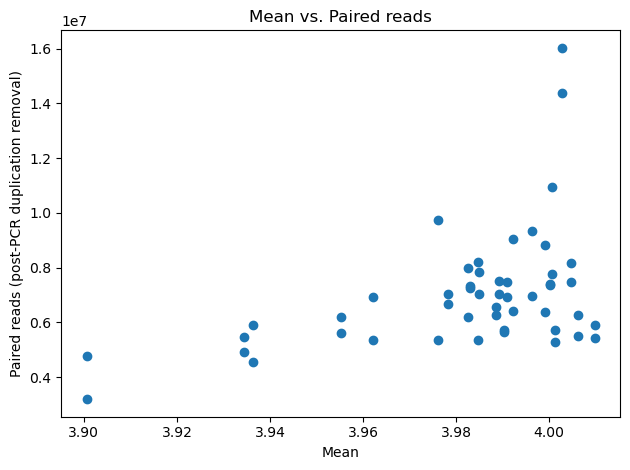

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Build the ordered list of IDs that exist in both
common = [
    sid for sid in filtered_stats_ordered["Sample ID"]
    if sid in set(sp_filtered["CellType"])
]

# 2a. Pull out 'mean' reindexed to `common`
x = (
    filtered_stats_ordered
    .set_index("Sample ID")        # index by Sample ID
    .reindex(common)               # keep only & reorder by common list
    ["Mean"]                       # select the column
)

# 2b. Pull out the paired-reads metric, likewise reindexed
y = (
    sp_filtered
    .set_index("CellType")         # index by CellType
    .reindex(common)               # same index list
    ["Paired.read.after.removing.PCR.duplication"]
)

# 2c. Quick sanity check
print("Length of x:", len(x))
print("Length of y:", len(y))
assert len(x) == len(y), "Still mismatched lengths!"

# 3. Plot
plt.figure()
plt.scatter(x.values, y.values)
plt.xlabel("Mean")
plt.ylabel("Paired reads (post-PCR duplication removal)")
plt.title("Mean vs. Paired reads")
plt.tight_layout()
plt.show()

